In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

In [ ]:
import pandas as pd

In [ ]:
%matplotlib inline

In [ ]:
data=pd.read_csv('diabetes.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
y=data[['Outcome']]
x=data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

In [ ]:
x.shape

(768, 8)

In [ ]:
x.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


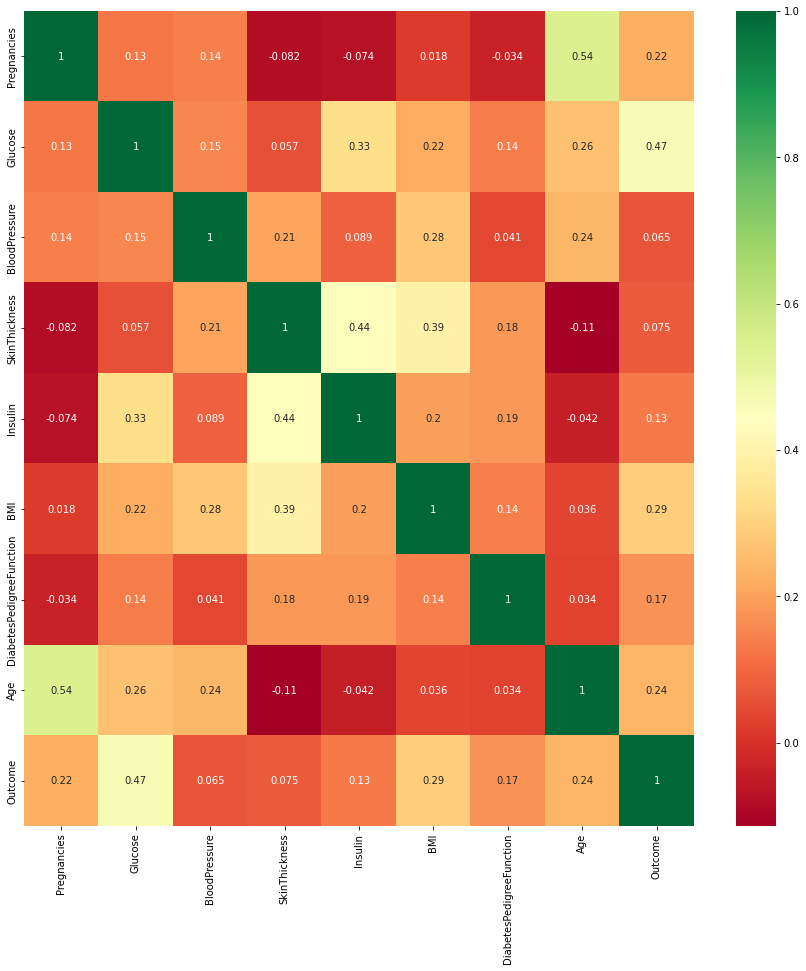

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(data[top_corr_features].corr(),annot = True,cmap='RdYlGn')

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
def fillskinthickness(row):
    if not((row['SkinThickness'])==0):
        return row['SkinThickness']
    if row['BMI']>=0 or row['BMI']<=100:        
        if row['BMI']>=30 or row['BMI']<40:
            return 35
        elif row['BMI']>=20 or row['BMI']<30:
            return 25
        elif row['BMI']>=40 or row['BMI']<50:
            return 45
        elif row['BMI']>=50 or row['BMI']<60:
            return 55

In [ ]:
x['SkinThickness']=x.apply(fillskinthickness, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
x['SkinThickness']

0      35.0
1      29.0
2      35.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    35.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x=imputer.fit_transform(x)
y = imputer.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.1,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponent = pca.fit_transform(x_train)
principalComponent = pca.fit_transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier



In [ ]:
classifier = RandomForestClassifier(n_estimators=10)

In [ ]:
classifier

RandomForestClassifier(n_estimators=10)

In [ ]:
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(n_estimators=10)

In [ ]:
print("Train Accuracy:",classifier.score(x_train, y_train))


Train Accuracy: 0.9811866859623734


In [ ]:
preds = classifier.predict(x_test)
from sklearn.metrics import accuracy_score, r2_score
print("Accuracy = {0:.3f}".format(accuracy_score(y_test, preds)))

Accuracy = 0.792


In [ ]:
print("R2 Score = {0:.3f}".format(r2_score(y_test, preds)))


R2 Score = 0.071


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
Y_pred = classifier.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[45  6]
 [ 8 18]]
precision is 0.75
recall is  0.6923076923076923
F1 score 0.7199999999999999
specificity is 0.8823529411764706


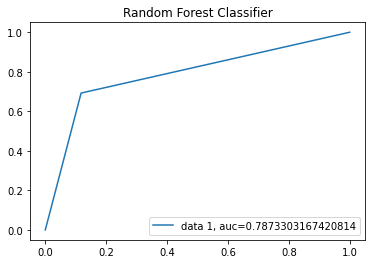

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = classifier.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('Random Forest Classifier', fontsize = 12)
plt.show()
plt.draw()
fig1.savefig('random forest.png', dpi=100)


In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, x_train, y_train.ravel(), cv=10)
print(score)

[0.75714286 0.66666667 0.7826087  0.75362319 0.72463768 0.84057971
 0.75362319 0.66666667 0.66666667 0.75362319]


In [ ]:
#bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
classifier = BaggingClassifier(n_estimators = 10)
bg = BaggingClassifier(RandomForestClassifier(),max_samples=0.5, max_features=1.0, n_estimators=20)
bg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
     

In [ ]:
bg.score(x_train, y_train)


0.8986975397973951

In [ ]:
bg.score(x_test, y_test)

0.7922077922077922

In [ ]:
Y_pred = bg.predict(x_test)
Y_pred = (Y_pred >0.5)
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[43  8]
 [ 8 18]]
precision is 0.6923076923076923
recall is  0.6923076923076923
F1 score 0.6923076923076923
specificity is 0.8431372549019608


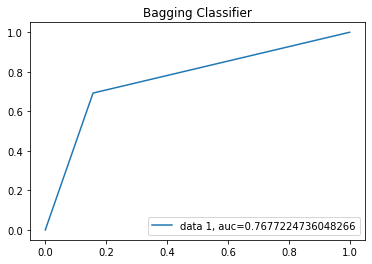

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = bg.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('Bagging Classifier', fontsize = 12)
plt.show()
plt.draw()
fig1.savefig('bagging classifier.png', dpi=100)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(bg, x_train, y_train.ravel(), cv=10)
print(score)

[0.8        0.71014493 0.76811594 0.76811594 0.79710145 0.7826087
 0.8115942  0.68115942 0.71014493 0.7826087 ]


In [ ]:
#boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ad = AdaBoostClassifier(n_estimators= 12)
ad.fit(x_train, y_train)
ad.score(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7973950795947902

In [ ]:
ad.score(x_test, y_test)

0.7922077922077922

In [ ]:
Y_pred =ad.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[42  9]
 [ 7 19]]
precision is 0.6785714285714286
recall is  0.7307692307692307
F1 score 0.7037037037037038
specificity is 0.8235294117647058


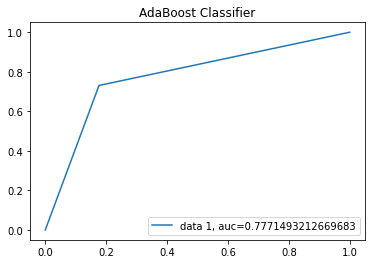

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = ad.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('AdaBoost Classifier', fontsize = 12)
plt.show()
plt.draw()
fig1.savefig('AdaBoostClassifier(before).png', dpi=100)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ad, x_train, y_train.ravel(), cv=10)
print(score)

[0.71428571 0.66666667 0.7826087  0.7826087  0.8115942  0.68115942
 0.73913043 0.69565217 0.73913043 0.76811594]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import tree


In [ ]:
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
for depth in range (1,10):
    tree_classifier=tree.DecisionTreeClassifier(max_depth=depth,random_state=1)
    if tree_classifier.fit(x_train,y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_classifier,x_train,y_train,scoring='accuracy', cv=crossvalidation,n_jobs=1))
    print(depth, score)


1 0.6946997929606626
2 0.7381780538302277
3 0.7324016563146997
4 0.714927536231884
5 0.7236024844720497
6 0.7207246376811594
7 0.7105590062111801
8 0.7062525879917184
9 0.6961283643892339


In [ ]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500, 1000],'learning_rate':[.001,0.01,.1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)


In [ ]:
search.fit(x_train,y_train)
search.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'learning_rate': 0.01, 'n_estimators': 500}

In [ ]:
ad1 = AdaBoostClassifier(n_estimators= 500, learning_rate=0.2)
ad1.fit(x_train, y_train)
ad1.score(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8408104196816208

In [ ]:
ad1.score(x_test, y_test)

0.8051948051948052

In [ ]:
Y_pred =ad1.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[44  7]
 [ 8 18]]
precision is 0.72
recall is  0.6923076923076923
F1 score 0.7058823529411765
specificity is 0.8627450980392157


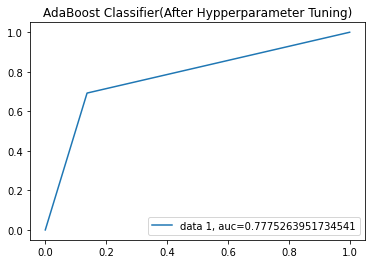

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = ad1.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('AdaBoost Classifier(After Hypperparameter Tuning)', fontsize = 12)
plt.show()
plt.draw()
fig1.savefig('AdaBoostClassifier.png', dpi=100)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(ad, x_train, y_train.ravel(), cv=10)
print(score)

[0.71428571 0.66666667 0.7826087  0.7826087  0.8115942  0.68115942
 0.73913043 0.69565217 0.73913043 0.76811594]


In [ ]:
#hyperparameter tunining

In [ ]:
params = {
    "n_jobs" : [1,2,3],
    "max_depth": [4, 6, 7, 8, 11, 13, 15],
    "n_estimators":[20,30,40,0, 60],
    "n_jobs" : [1,2,3]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [ ]:
classifier1 = RandomForestClassifier()

In [ ]:
random_search = RandomizedSearchCV(classifier1, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=3, cv=5, verbose=True)


In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time Taken: %i hours %i minutes and %i seconds." %(thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
start_time = timer(None)
random_search.fit(x_train, y_train.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.



 Time Taken: 0 hours 0 minutes and 2 seconds.


[Parallel(n_jobs=3)]: Done  25 out of  25 | elapsed:    2.7s finished


In [ ]:
random_search.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
classifier1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
classifier1.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_preds = classifier1.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_preds)
score = accuracy_score(y_test, y_preds)
print(score)
print(cm)

0.8181818181818182
[[44  7]
 [ 7 19]]


In [ ]:
print("Train Accuracy:",classifier1.score(x_train, y_train))
preds = classifier1.predict(x_test)
from sklearn.metrics import accuracy_score, r2_score
print("Accuracy = {0:.3f}".format(accuracy_score(y_test, preds)))

Train Accuracy: 0.8191027496382055
Accuracy = 0.818


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
Y_pred = classifier1.predict(x_test)
Y_pred = (Y_pred >0.5)
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[44  7]
 [ 8 18]]
precision is 0.72
recall is  0.6923076923076923
F1 score 0.7058823529411765
specificity is 0.8627450980392157


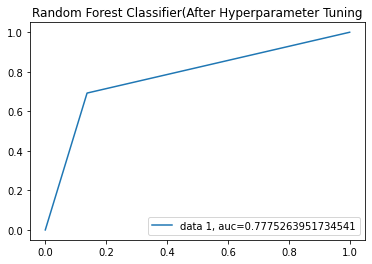

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = classifier1.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('Random Forest Classifier(After Hyperparameter Tuning', fontsize = 12)

plt.show()
plt.draw()
fig1.savefig('Random Forest(after grid search).png', dpi=100)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier1, x_train, y_train.ravel(), cv=10)
print(score)

[0.74285714 0.69565217 0.75362319 0.7826087  0.8115942  0.8115942
 0.7826087  0.69565217 0.68115942 0.8115942 ]


In [ ]:
#xgboost classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=15)

In [ ]:
xgb.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=15, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("Train Accuracy:",xgb.score(x_train, y_train))
xgb.score(x_train, y_train)

Train Accuracy: 0.8133140376266281


0.8133140376266281

In [ ]:
xgb.score(x_test, y_test)

0.8051948051948052

In [ ]:
preds = xgb.predict(x_test)

from sklearn.metrics import accuracy_score, r2_score

print("Accuracy = {0:.3f}".format(accuracy_score(y_test, preds)))

Accuracy = 0.805


In [ ]:
print("R2 Score = {0:.3f}".format(r2_score(y_test, preds)))

R2 Score = 0.129


In [ ]:
Y_pred = xgb.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[44  7]
 [ 8 18]]
precision is 0.72
recall is  0.6923076923076923
F1 score 0.7058823529411765
specificity is 0.8627450980392157


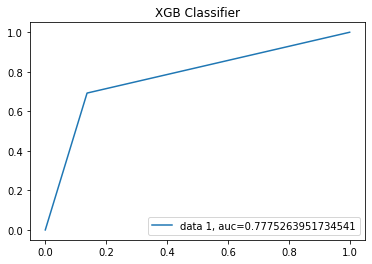

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = xgb.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('XGB Classifier', fontsize = 12)

plt.show()
plt.draw()
fig1.savefig('Xgboost.png', dpi=100)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(xgb, x_train, y_train.ravel(), cv=10)
print(score)

[0.74285714 0.68115942 0.75362319 0.82608696 0.76811594 0.76811594
 0.7826087  0.71014493 0.72463768 0.79710145]


In [ ]:
#randomizedsearchCV

In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='roc_auc', n_jobs=-1, cv=5, verbose=True)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print("\n Time Taken: %i hours %i minutes and %i seconds." %(thour, tmin, round(tsec, 2)))


In [ ]:
from datetime import datetime
start_time = timer(None)
random_search.fit(x_train, y_train.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.



 Time Taken: 0 hours 0 minutes and 12 seconds.


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   12.5s finished


In [ ]:
random_search.best_estimator_


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=3,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
classifier2 = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth = 17,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
classifier2.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=17,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=2,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
print("Train Accuracy:",classifier2.score(x_train, y_train))
classifier2.score(x_train, y_train)

Train Accuracy: 0.9985528219971056


0.9985528219971056

In [ ]:
classifier2.score(x_test, y_test)

0.8181818181818182

In [ ]:
preds = classifier2.predict(x_test)
from sklearn.metrics import accuracy_score, r2_score
print("Accuracy = {0:.3f}".format(accuracy_score(y_test, preds)))

Accuracy = 0.818


In [ ]:
print("R2 Score = {0:.3f}".format(r2_score(y_test, preds)))

R2 Score = 0.187


In [ ]:
Y_pred = classifier2.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[44  7]
 [ 7 19]]
precision is 0.7307692307692307
recall is  0.7307692307692307
F1 score 0.7307692307692306
specificity is 0.8627450980392157


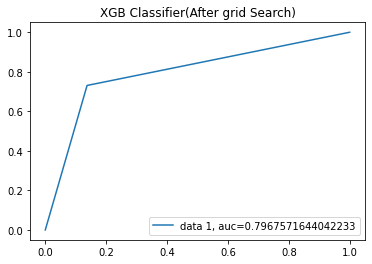

<Figure size 432x288 with 0 Axes>

In [ ]:
Y_pred_proba = classifier2.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
fig1 = plt.gcf()
plt.title('XGB Classifier(After grid Search)', fontsize = 12)

plt.show()
plt.draw()
fig1.savefig('Xgboost(after grid search).png', dpi=100)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier2, x_train, y_train.ravel(), cv=10)
print(score)

[0.82857143 0.73913043 0.79710145 0.69565217 0.76811594 0.84057971
 0.76811594 0.71014493 0.72463768 0.7826087 ]


In [ ]:
#neural networks

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(1024, input_dim=8, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.4))
model.add(Dense(128, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(32, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.summary() #Print model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              9216      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4

In [ ]:
model.compile(loss= "binary_crossentropy" , optimizer="Adam", metrics=["accuracy"])
Performance = model.fit(x_train, y_train, validation_split =0.2,epochs=50, batch_size = 20)

Epoch 1/50
28/28 [==============================] - 1s 12ms/step - loss: 1.6411 - accuracy: 0.6739 - val_loss: 0.8304 - val_accuracy: 0.7266
Epoch 2/50
28/28 [==============================] - 0s 7ms/step - loss: 0.7169 - accuracy: 0.7373 - val_loss: 0.6245 - val_accuracy: 0.7482
Epoch 3/50
28/28 [==============================] - 0s 7ms/step - loss: 0.6420 - accuracy: 0.7138 - val_loss: 0.7694 - val_accuracy: 0.7770
Epoch 4/50
28/28 [==============================] - 0s 6ms/step - loss: 0.7182 - accuracy: 0.7029 - val_loss: 0.5531 - val_accuracy: 0.7050
Epoch 5/50
28/28 [==============================] - 0s 7ms/step - loss: 0.7737 - accuracy: 0.7283 - val_loss: 0.7848 - val_accuracy: 0.7194
Epoch 6/50
28/28 [==============================] - 0s 6ms/step - loss: 0.8087 - accuracy: 0.7228 - val_loss: 0.8076 - val_accuracy: 0.7626
Epoch 7/50
28/28 [==============================] - 0s 6ms/step - loss: 0.6593 - accuracy: 0.7482 - val_loss: 0.5770 - val_accuracy: 0.7554
Epoch 8/50
28/28 [=

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 1)
score[1]

3/3 [==============================] - 0s 4ms/step - loss: 1.1024 - accuracy: 0.8182


0.8181818127632141

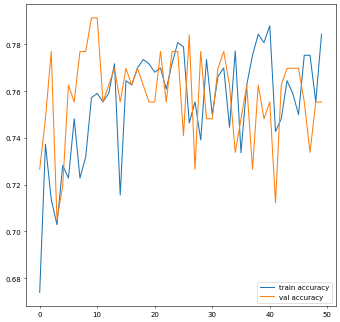

<Figure size 432x288 with 0 Axes>

In [ ]:
my_dpi = 50 # dots per inch .. (resolution)
plt.figure(figsize=(400/my_dpi, 400/my_dpi), dpi = my_dpi)
plt.plot(Performance.history['accuracy'], label='train accuracy')
plt.plot(Performance.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


Accuracy Score: %81.82 
F1 Score: %70.83



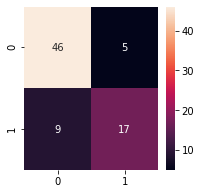

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
y_pred_ann=model.predict(x_test)
y_pred_ann=(y_pred_ann>0.5)
acc_ann=accuracy_score(y_test,y_pred_ann)

f1_score_ann=f1_score(y_test,y_pred_ann)
plt.figure(figsize=(3,3))
crr_NN=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(crr_NN,annot=True)
plt.plot()
print("\nAccuracy Score: %{:.2f} \nF1 Score: %{:.2f}\n".format(acc_ann*100,f1_score_ann*100))

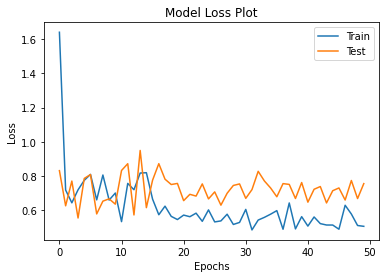

In [ ]:
import matplotlib.pyplot as plt                             ###plot loss on train and val data
plt.plot(Performance.history['loss'])
plt.plot(Performance.history['val_loss'])
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc = 'upper right')
plt.show()

In [ ]:
model.save('Performance.hdf5')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
Y_pred = model.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[46  5]
 [ 9 17]]
precision is 0.7727272727272727
recall is  0.6538461538461539
F1 score 0.7083333333333333
specificity is 0.9019607843137255


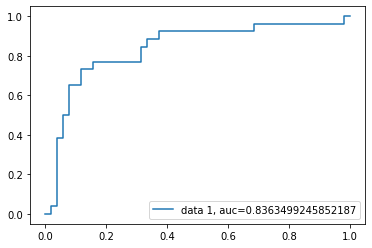

In [ ]:
Y_pred_proba = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
kf = KFold(n_splits=10, shuffle=True, random_state=42069)
preds = []
fold = 0
aucs = 0
for train_idx, val_idx in kf.split(x_train):
    x_train_f = x_train[train_idx]
    y_train_f = y_train[train_idx]
    x_val_f = x_train[val_idx]
    y_val_f = y_train[val_idx]
    model.fit(x_train_f, y_train_f,
              batch_size=256,
              epochs=10,
              verbose = 0,
              validation_data=(x_val_f, y_val_f))
    # Get accuracy of model on validation data. It's not AUC but it's something at least!
    preds_val = model.predict([x_val_f], batch_size=256)
    preds.append(model.predict(x_test))
    fold = fold + 1
    fpr, tpr, thresholds = roc_curve(y_val_f, preds_val, pos_label=0)
    aucs = aucs + auc(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(y_val_f, preds_val, pos_label=1)
    aucs += auc(fpr,tpr)
    print('Fold {}, AUC = {}'.format(fold,auc(fpr, tpr)))
print("Cross Validation AUC = {}".format(aucs/10))   

Fold 1, AUC = 0.864795918367347
Fold 2, AUC = 0.8723404255319149
Fold 3, AUC = 0.8617021276595743
Fold 4, AUC = 0.9119922630560928
Fold 5, AUC = 0.9398954703832753
Fold 6, AUC = 0.8747795414462081
Fold 7, AUC = 0.89198606271777
Fold 8, AUC = 0.9057539682539681
Fold 9, AUC = 0.941972920696325
Fold 10, AUC = 0.9168278529980658
Cross Validation AUC = 0.9999999999999998


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM, Bidirectional, Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense 
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from keras.layers import Layer
import keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [ ]:
def model_create(optimizer = 'Adam',
                 dropout_rate = 0.2,units = 128,neurons = 20):
    model = tf.keras.Sequential()
    model = tf.keras.Sequential()
    model.add(Dense(1024, input_dim=8, activation= "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation= "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation= "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation= "relu"))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])    
    return model

In [ ]:
param_grid = {
    'dropout_rate':[0.1,0.2,0.3,0.4,0.5]
}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(x_train, y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

In [ ]:
param_grid = {
    'batch_size':[8,16,32,64]
}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2, cv=2)
grid_results = grid_search.fit(x_train, y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

In [ ]:
param_grid = {
    'neurons':[20,30,40,50,60]

}                                                             ####perform grid search to find the hyperparameters

model = KerasClassifier(build_fn = model_create, verbose = 2)
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 2)
grid_results = grid_search.fit(x_train, y_train, epochs = 10)
print('Best accuracy: ', grid_results.best_score_)
print('Best parameters: ', grid_results.best_params_)

In [ ]:
#models with optimised parameter

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import MaxPooling2D,GlobalAveragePooling2D,BatchNormalization,Activation
from tensorflow import keras
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()
model.add(Dense(2048, input_dim=8, activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(1024, activation= "relu"))
model.add(Dropout(0.4))
model.add(Dense(512, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(256, activation= "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))
model.summary() #Print model Summary

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2048)              18432     
                                                                 
 dropout_8 (Dropout)         (None, 2048)              0         
                                                                 
 dense_11 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               524800    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 256)              

In [ ]:
model.compile(loss= "binary_crossentropy" , optimizer="SGD", metrics=["accuracy"])

In [ ]:
Performance1 = model.fit(x_train, y_train, validation_split =0.2,epochs=50, batch_size = 10)

Epoch 1/50
56/56 [==============================] - 3s 32ms/step - loss: 0.6714 - accuracy: 0.6232 - val_loss: 0.6374 - val_accuracy: 0.6906
Epoch 2/50
56/56 [==============================] - 2s 31ms/step - loss: 0.6425 - accuracy: 0.6431 - val_loss: 0.6037 - val_accuracy: 0.6906
Epoch 3/50
56/56 [==============================] - 2s 30ms/step - loss: 0.6220 - accuracy: 0.6395 - val_loss: 0.5754 - val_accuracy: 0.7122
Epoch 4/50
56/56 [==============================] - 1s 25ms/step - loss: 0.5977 - accuracy: 0.6576 - val_loss: 0.5471 - val_accuracy: 0.7482
Epoch 5/50
56/56 [==============================] - 2s 31ms/step - loss: 0.5674 - accuracy: 0.6938 - val_loss: 0.5251 - val_accuracy: 0.7554
Epoch 6/50
56/56 [==============================] - 2s 32ms/step - loss: 0.5489 - accuracy: 0.7192 - val_loss: 0.5066 - val_accuracy: 0.7482
Epoch 7/50
56/56 [==============================] - 2s 32ms/step - loss: 0.5251 - accuracy: 0.7464 - val_loss: 0.4967 - val_accuracy: 0.7338
Epoch 8/50
56

In [ ]:
score = model.evaluate(x_test,y_test,verbose = 1)
score[1]

3/3 [==============================] - 0s 9ms/step - loss: 0.5311 - accuracy: 0.8312


0.8311688303947449

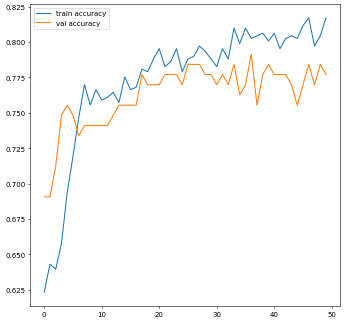

<Figure size 432x288 with 0 Axes>

In [ ]:
my_dpi = 50 # dots per inch .. (resolution)
plt.figure(figsize=(400/my_dpi, 400/my_dpi), dpi = my_dpi)
plt.plot(Performance1.history['accuracy'], label='train accuracy')
plt.plot(Performance1.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



Accuracy Score: %83.12 
F1 Score: %74.51



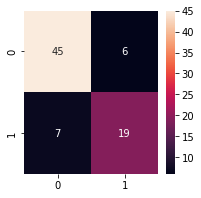

In [ ]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix
y_pred_ann=model.predict(x_test)
y_pred_ann=(y_pred_ann>0.5)
acc_ann=accuracy_score(y_test,y_pred_ann)

f1_score_ann=f1_score(y_test,y_pred_ann)
plt.figure(figsize=(3,3))
crr_NN=confusion_matrix(y_test,y_pred_ann)
sns.heatmap(crr_NN,annot=True)
plt.plot()
print("\nAccuracy Score: %{:.2f} \nF1 Score: %{:.2f}\n".format(acc_ann*100,f1_score_ann*100))

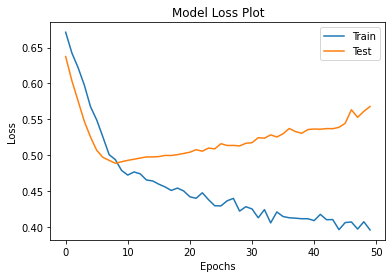

In [ ]:
import matplotlib.pyplot as plt                             ###plot loss on train and val data
plt.plot(Performance1.history['loss'])
plt.plot(Performance1.history['val_loss'])
plt.title('Model Loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'],loc = 'upper right')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
Y_pred = model.predict(x_test)
Y_pred = (Y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[45  6]
 [ 7 19]]
precision is 0.76
recall is  0.7307692307692307
F1 score 0.7450980392156863
specificity is 0.8823529411764706


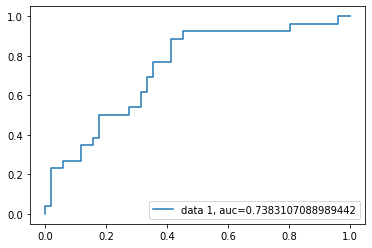

In [ ]:
Y_pred_proba = model.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
kf = KFold(n_splits=10, shuffle=True, random_state=42069)
preds = []
fold = 0
aucs = 0
for train_idx, val_idx in kf.split(x_train):
    x_train_f = x_train[train_idx]
    y_train_f = y_train[train_idx]
    x_val_f = x_train[val_idx]
    y_val_f = y_train[val_idx]
    model.fit(x_train_f, y_train_f,
              batch_size=256,
              epochs=10,
              verbose = 0,
              validation_data=(x_val_f, y_val_f))
    # Get accuracy of model on validation data. It's not AUC but it's something at least!
    preds_val = model.predict([x_val_f], batch_size=256)
    preds.append(model.predict(x_test))
    fold = fold + 1
    fpr, tpr, thresholds = roc_curve(y_val_f, preds_val, pos_label=0)
    aucs = aucs + auc(fpr, tpr)
    fpr, tpr, thresholds = roc_curve(y_val_f, preds_val, pos_label=1)
    aucs += auc(fpr,tpr)
    print('Fold {}, AUC = {}'.format(fold,auc(fpr, tpr)))
print("Cross Validation AUC = {}".format(aucs/10))   

Fold 1, AUC = 0.6275510204081632
Fold 2, AUC = 0.6663442940038685
Fold 3, AUC = 0.7040618955512572
Fold 4, AUC = 0.832688588007737
Fold 5, AUC = 0.8458188153310104
Fold 6, AUC = 0.7425044091710757
Fold 7, AUC = 0.686411149825784
Fold 8, AUC = 0.6795634920634921
Fold 9, AUC = 0.7456479690522244
Fold 10, AUC = 0.7514506769825918
Cross Validation AUC = 1.0


In [ ]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


In [ ]:
estimators = []
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))
model15 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic5', model15))
#Defining 5 Decision Tree Classifiers
model16 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 2)
estimators.append(('cart2', model17))
model19 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart4', model19))
#Defining 5 Support Vector Classifiers
model22 = SVC(kernel = 'poly', degree = 3)
estimators.append(('svm2', model22))
model23 = SVC(kernel = 'rbf')
estimators.append(('svm3', model23))
model24 = SVC(kernel = 'rbf')
estimators.append(('svm4', model24))
#Defining 5 K-NN classifiers
model26 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
estimators.append(('knn2', model27))
model29 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 1)
estimators.append(('knn4', model29))
model30 = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 1)
estimators.append(('knn5', model30))

#Defining 5 Naive Bayes classifiers
model31 = GaussianNB()
estimators.append(('nbs1', model31))
model32 = GaussianNB()
estimators.append(('nbs2', model32))
model34 = GaussianNB()
estimators.append(('nbs4', model34))
model35 = GaussianNB()
estimators.append(('nbs5', model35))

# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x_train, y_train)
y_pred = ensemble.predict(x_test)

#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)
cm_HybridEnsembler

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[46,  5],
       [ 9, 17]])

In [ ]:
y_pred = ensemble.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nconfusion_matrix\n", cm)
acc = round(ensemble.score(x_train, y_train) * 100, 2)
print("\nTraining accuracy\n", acc)
from sklearn.metrics import accuracy_score
print("\nTesting accuracy\n", accuracy_score(y_test, y_pred))


confusion_matrix
 [[46  5]
 [ 9 17]]

Training accuracy
 79.88

Testing accuracy
 0.8181818181818182


In [ ]:
Y_pred = ensemble.predict(x_test)
Y_pred = (y_pred >0.5)

In [ ]:
confusion = confusion_matrix(y_test,Y_pred)        ###Model evaluation
precision = precision_score(y_test,Y_pred)
recall = recall_score(y_test,Y_pred)
F1 = f1_score(y_test,Y_pred)
specificity = (confusion[0][0]/(confusion[0][0]+confusion[0][1]))
print('confusion matrix {}'.format(confusion))
print('precision is {}'.format(precision))
print('recall is  {}'.format(recall))
print('F1 score {}'.format(F1))
print('specificity is {}'.format(specificity))

confusion matrix [[46  5]
 [ 9 17]]
precision is 0.7727272727272727
recall is  0.6538461538461539
F1 score 0.7083333333333333
specificity is 0.9019607843137255


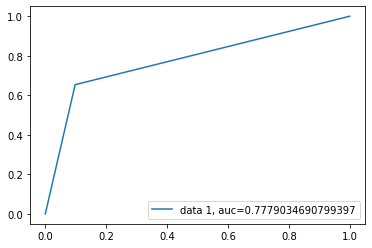

In [ ]:
Y_pred_proba = ensemble.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, Y_pred_proba)
auc = roc_auc_score(y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()